<h1 align = 'center'> Jupyter ile Yapay Sinir Ağları </h1>
<h2 align = 'center'> 1 - Veri ve Mimari </h2>

<h4 align = 'center' > Welch Labs </h4>

<h3 align = 'center'> Değişkenler </h3>

| Koddaki Sembol | Matematiksel Sembol | Tanım | Boyutlar
| :-: | :-: | :-: | :-: |
|X|$$X$$|Giriş Verisi | (ornekSayisi, girisKatman)|
|y |$$y$$| Hedef Veri |(ornekSayisi, cikisKatman)|

Herhangi bir x değişkenine veya değişkenlerine bağlı bir skaler y değişkenimizin olduğu bir tablomuz olsun.
Diyelim ki sınav öncesi son gece uyuduğumuz saat ve çalıştığımız saat  bizim 
x1 ve x2 değişkenlerimiz olsun. Sınav sonucumuz da buna bağlı bir skaler y olmak üzere 

| Uyku | Çalışma | Sonuç
| :-: | :-: | :-: | :-: |
|3     |  5     |  75  |
|5     |  1     |  82  |
|10    |  2     |  93  |
Değerlerimizi numpy dizilerine aktaralım.
Amacımız, bir sonraki uyku ve çalışma saatlerimizden hareketle, sınav sonucunu tahmin etmek için bir model geliştirmek.


In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
# X = (uyku, calisma), y = sonuc
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [15]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [16]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

Amacımız bir sonraki uyku ve çalışma saatlerimizden hareketle, sınav sonucunu tahmin etmek için bir model geliştirmek. Elimizde bir Gözetimli Regresyon modeli bulunmakta. Gözetimli dememizin sebebi giriş ve çıkış değerlerini etiketlediğimiz için bunlardan hareketle yeni sonucu üretebiliyor olmamızdan. Regresyon problemi olmasının sebebi ise giriş değerlerini tek bir skaler değişkende özetleyerek sürekli bir eğride ifade edebiliyor oluşumuzdan kaynaklanıyor.

Eğer sınav sonucunu 0-100 arasında skaler bir değer olarak almak yerine harf notu olarak bulmaya çalışsaydık, problemimiz bir öbekleme problemi haline gelecekti. Ağımızı eğitmeye başlamadan önce elimizdeki verileri birimleştirmeliyiz ki bir standardımız olsun. Elimizdeki değerlerin hepsi pozitif, ve sınav sonucunun en fazla 100 olabileceğini kabul ederek normalize edelim.

In [17]:
X = X/np.amax(X, axis=0)
y = y/100 #Sonuç En fazla 100 olabilir

In [18]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [19]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Giriş Değerlerimiz iki boyutlu, sonucumuz y ise bir skaler, y den farklı olmak üzere y^ yhat terimini kullanmamızın sebebi ise yhat'ın bizim olası gördüğümüz, yani tahmin ettiğimiz sonuç olmasından kaynaklanıyor.Giriş ve sonuç arasındaki katmanlara saklı katmanlar diyoruz, çok sayıda ara katmanın karmaşık problemleri oluşturduğu ağlar için derin inanç ağları diyoruz. 

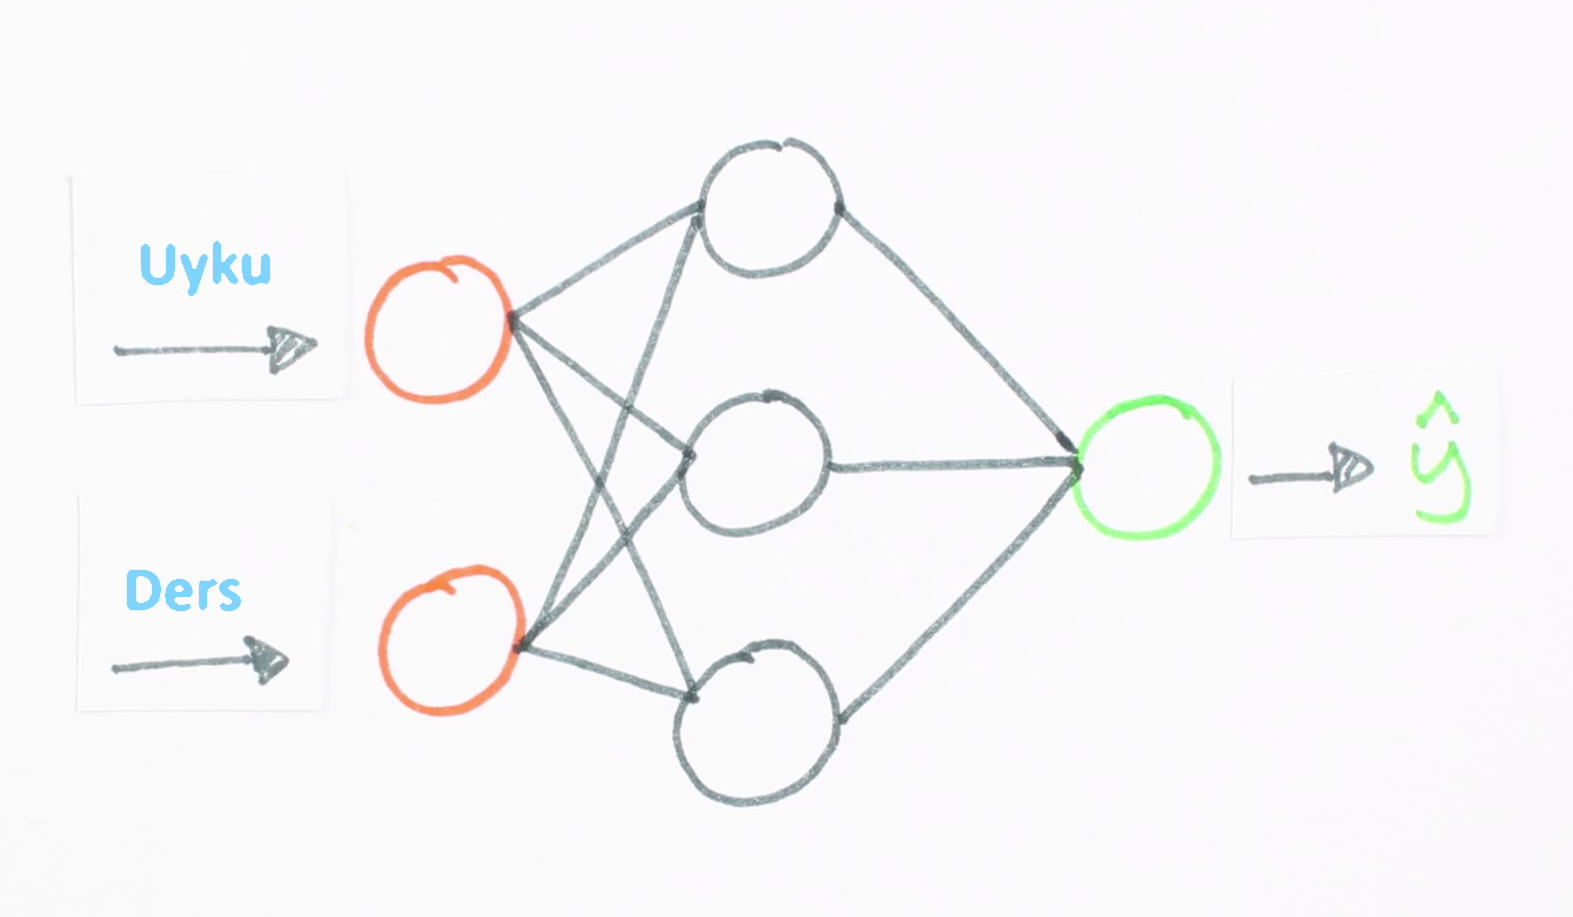

In [20]:
from IPython.display import Image
i = Image(filename='images/basitAg.png')
i

Bizim problemimizde sadece 3 boyutlu bir ara katman bulunmakta. Yuvarlaklarımız nöronlarımız. Çizgiler de sinapslar. Sinapsların görevi aldıkları giriş değerini spesifik bir ağırlık değeriyle çarparak bir sonraki nörona iletmek. Nöronlar ise bağlı olan tüm sinapslardan gelen girişleri toplamak ve aktivasyon fonksiyonuna sokmaktır.